# DL Lab 3
# Shresht Mishra
# 211020450

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## A) Perform the following tasks without preprocessing:

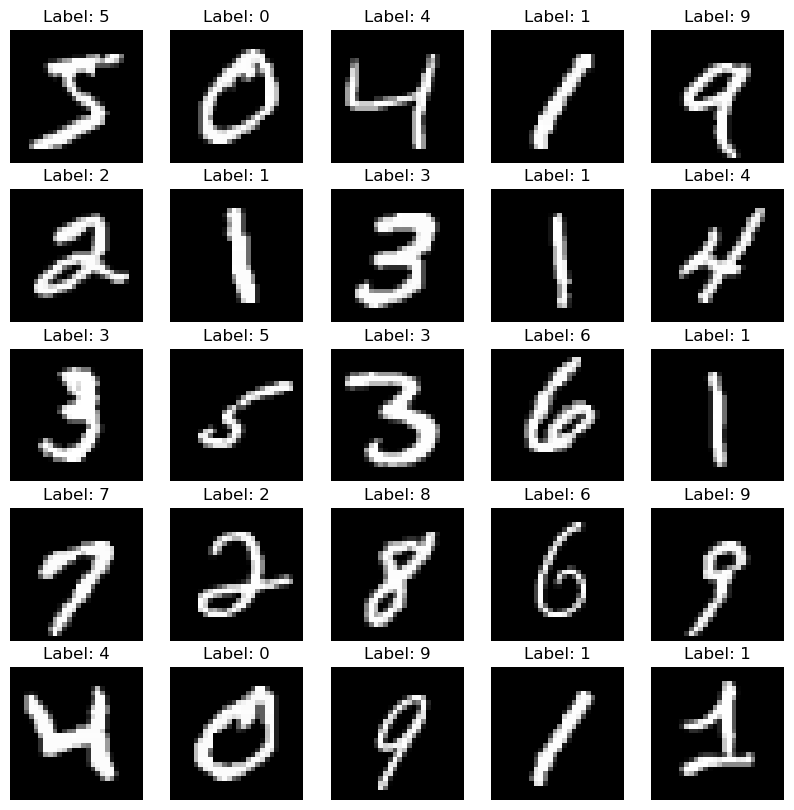

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f'Label: {train_labels[i]}')
    plt.axis('off')
plt.show()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

### 1.Apply the convolution neural network architecture to the above dataset.

In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

### 2. Demonstrate the results with various learning rates.

In [4]:
learning_rates = [0.001, 0.01, 0.1]
history_dict = {}
for lr in learning_rates:
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))
    history_dict[lr] = history
plt.figure(figsize=(12, 6))
for lr, history in history_dict.items():
    plt.plot(history.history['accuracy'], label=f'LR={lr}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy for Different Learning Rates')
plt.legend()
plt.grid()
plt.show()

Epoch 1/5
938/938 [==============================] - 7s 5ms/step - loss: 0.1820 - accuracy: 0.9440 - val_loss: 0.0483 - val_accuracy: 0.9850
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0474 - accuracy: 0.9856 - val_loss: 0.0317 - val_accuracy: 0.9897
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0334 - accuracy: 0.9892 - val_loss: 0.0312 - val_accuracy: 0.9889
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0261 - accuracy: 0.9915 - val_loss: 0.0303 - val_accuracy: 0.9897
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0213 - accuracy: 0.9931 - val_loss: 0.0277 - val_accuracy: 0.9902
Epoch 1/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0952 - accuracy: 0.9718 - val_loss: 0.0803 - val_accuracy: 0.9757
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0783 - accuracy: 0.9779 - val_loss: 0.0938 - val_accuracy: 0.9729
Epoch 3/5
938

KeyboardInterrupt: 

### 3. Demonstrate the results with various Activation functions.

Epoch 1/5
938/938 [==============================] - 8s 8ms/step - loss: 0.1808 - accuracy: 0.9434 - val_loss: 0.0654 - val_accuracy: 0.9801
Epoch 2/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0492 - accuracy: 0.9851 - val_loss: 0.0344 - val_accuracy: 0.9875
Epoch 3/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0356 - accuracy: 0.9886 - val_loss: 0.0295 - val_accuracy: 0.9907
Epoch 4/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0283 - accuracy: 0.9909 - val_loss: 0.0355 - val_accuracy: 0.9884
Epoch 5/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0207 - accuracy: 0.9936 - val_loss: 0.0350 - val_accuracy: 0.9890
Epoch 1/5
938/938 [==============================] - 8s 8ms/step - loss: 0.8864 - accuracy: 0.7087 - val_loss: 0.1833 - val_accuracy: 0.9508
Epoch 2/5
938/938 [==============================] - 8s 8ms/step - loss: 0.1402 - accuracy: 0.9607 - val_loss: 0.0900 - val_accuracy: 0.9734
Epoch 3/5
938

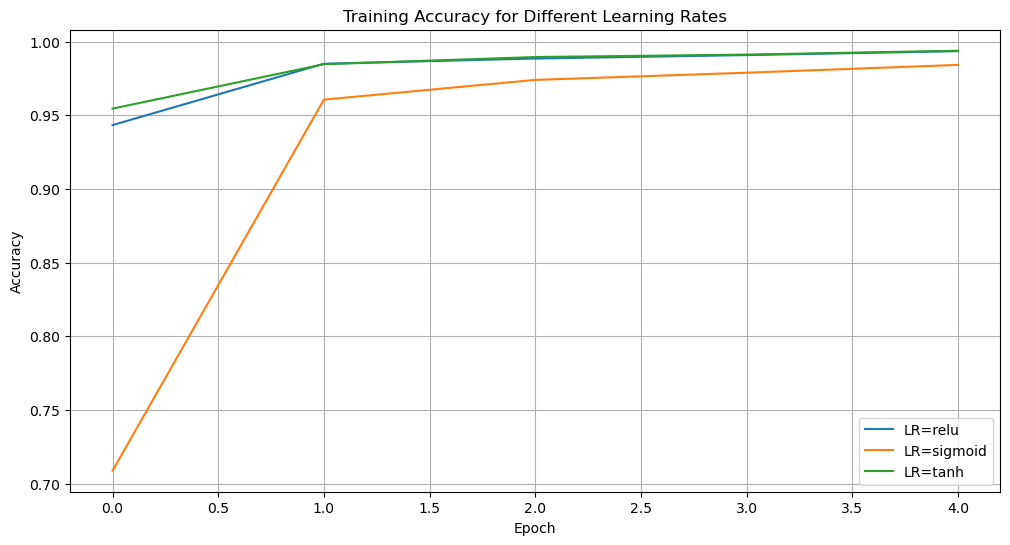

In [6]:
activation_functions = ['relu', 'sigmoid', 'tanh']
history_dict_act = {}
for activation_func in activation_functions:
    model_act = Sequential([
        Conv2D(32, (3, 3), activation=activation_func, input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation=activation_func),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation=activation_func),
        Flatten(),
        Dense(64, activation=activation_func),
        Dense(10, activation='softmax')
    ])
    model_act.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history_act = model_act.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))
    history_dict_act[activation_func] = history_act
plt.figure(figsize=(12, 6))
for activation_func, history_act in history_dict_act.items():
    plt.plot(history_act.history['accuracy'], label=f'LR={activation_func}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy for Different Learning Rates')
plt.legend()
plt.grid()
plt.show()

### 4. Demonstrate the results with all possible evaluation criteria.

In [10]:
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [11]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))
predictions = model2.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")
print("Confusion Matrix:\n", conf_matrix)

Epoch 1/5
938/938 [==============================] - 8s 8ms/step - loss: 0.1788 - accuracy: 0.9450 - val_loss: 0.0447 - val_accuracy: 0.9857
Epoch 2/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0492 - accuracy: 0.9851 - val_loss: 0.0357 - val_accuracy: 0.9884
Epoch 3/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0356 - accuracy: 0.9888 - val_loss: 0.0380 - val_accuracy: 0.9883
Epoch 4/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0283 - accuracy: 0.9914 - val_loss: 0.0325 - val_accuracy: 0.9900
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
Accuracy: 0.9927, Precision: 0.9927178196947072, Recall: 0.9927, F1-Score: 0.9927018943779201
Confusion Matrix:
 [[ 975    1    0    0    1    0    1    1    1    0]
 [   0 1133    0    1    0    0    0    1    0    0]
 [   0    3 1022    0    1    0    0    5    1    0]
 [   0    0    1 1004    0    3    0    1    1    0]
 [   0    0    1    0  976    0    1    0    0

### 5. Demonstrate the learning results in all possible visualizing ways.

Epoch 1/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0181 - accuracy: 0.9940 - val_loss: 0.0253 - val_accuracy: 0.9918
Epoch 2/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0146 - accuracy: 0.9947 - val_loss: 0.0367 - val_accuracy: 0.9913
Epoch 3/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0127 - accuracy: 0.9961 - val_loss: 0.0323 - val_accuracy: 0.9903
Epoch 4/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0109 - accuracy: 0.9965 - val_loss: 0.0300 - val_accuracy: 0.9922
Epoch 5/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0091 - accuracy: 0.9969 - val_loss: 0.0392 - val_accuracy: 0.9900
Epoch 6/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0086 - accuracy: 0.9972 - val_loss: 0.0309 - val_accuracy: 0.9920
Epoch 7/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0082 - accuracy: 0.9973 - val_loss: 0.0508 - val_accuracy: 0.9880
Epoch 

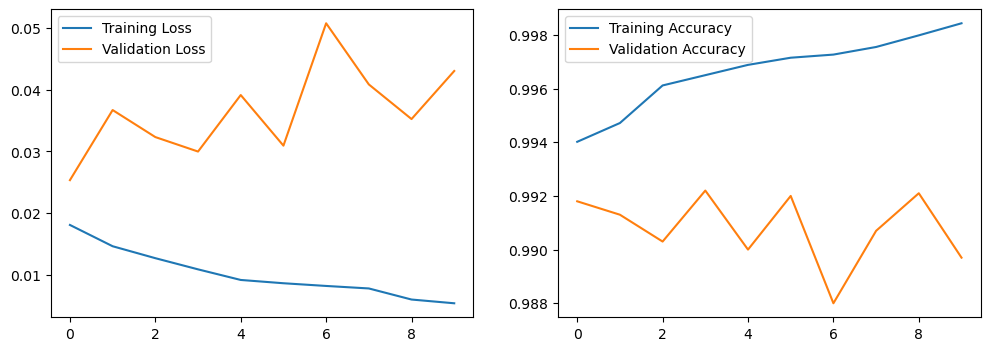

In [12]:
history2 = model2.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

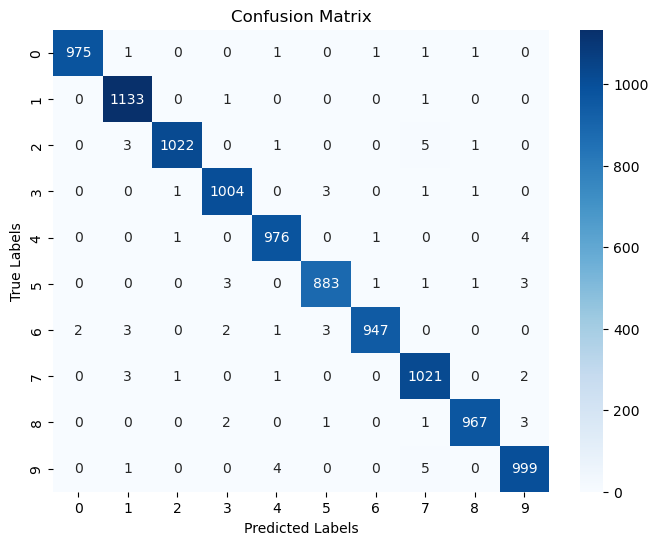

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## B) Perform the following tasks with preprocessing:

### 1. Apply the convolution neural network architecture to the above dataset.

In [14]:
model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [17]:
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen.fit(train_images)

### 2. Demonstrate the results with various learning rates.

Epoch 1/10
938/938 [==============================] - 17s 18ms/step - loss: 0.5921 - accuracy: 0.8027 - val_loss: 0.1258 - val_accuracy: 0.9603
Epoch 2/10
938/938 [==============================] - 16s 18ms/step - loss: 0.2286 - accuracy: 0.9286 - val_loss: 0.0854 - val_accuracy: 0.9729
Epoch 3/10
938/938 [==============================] - 16s 17ms/step - loss: 0.1674 - accuracy: 0.9475 - val_loss: 0.0747 - val_accuracy: 0.9752
Epoch 4/10
938/938 [==============================] - 16s 18ms/step - loss: 0.1380 - accuracy: 0.9564 - val_loss: 0.0608 - val_accuracy: 0.9794
Epoch 5/10
938/938 [==============================] - 17s 18ms/step - loss: 0.1206 - accuracy: 0.9626 - val_loss: 0.0589 - val_accuracy: 0.9805
Epoch 6/10
938/938 [==============================] - 16s 17ms/step - loss: 0.1089 - accuracy: 0.9656 - val_loss: 0.0824 - val_accuracy: 0.9734
Epoch 7/10
938/938 [==============================] - 17s 18ms/step - loss: 0.1001 - accuracy: 0.9686 - val_loss: 0.0537 - val_accuracy:

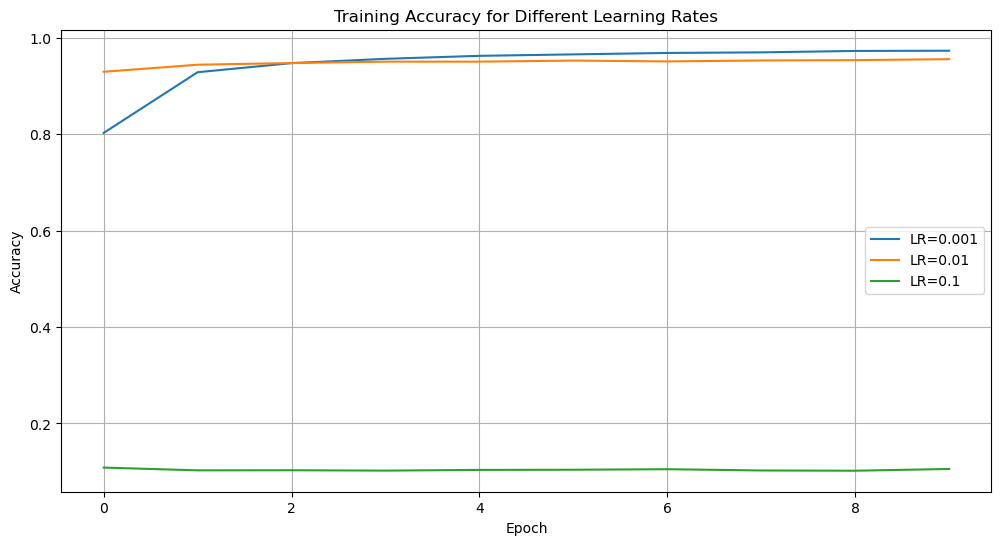

In [18]:
learning_rates = [0.001, 0.01, 0.1]
history_dict2 = {}
for lr in learning_rates:
    model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    history2 = model3.fit(datagen.flow(train_images, train_labels, batch_size=64), epochs=10, validation_data=(test_images, test_labels))
    history_dict2[lr] = history2
plt.figure(figsize=(12, 6))
for lr, history2 in history_dict2.items():
    plt.plot(history2.history['accuracy'], label=f'LR={lr}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy for Different Learning Rates')
plt.legend()
plt.grid()
plt.show()

### 3.Demonstrate the results with various Activation functions.

Epoch 1/5
938/938 [==============================] - 17s 18ms/step - loss: 0.5856 - accuracy: 0.8051 - val_loss: 0.1314 - val_accuracy: 0.9562
Epoch 2/5
938/938 [==============================] - 17s 18ms/step - loss: 0.2211 - accuracy: 0.9304 - val_loss: 0.0800 - val_accuracy: 0.9729
Epoch 3/5
938/938 [==============================] - 17s 18ms/step - loss: 0.1582 - accuracy: 0.9499 - val_loss: 0.0797 - val_accuracy: 0.9740
Epoch 4/5
938/938 [==============================] - 17s 18ms/step - loss: 0.1369 - accuracy: 0.9566 - val_loss: 0.0653 - val_accuracy: 0.9780
Epoch 5/5
938/938 [==============================] - 17s 18ms/step - loss: 0.1169 - accuracy: 0.9632 - val_loss: 0.0754 - val_accuracy: 0.9774
Epoch 1/5
938/938 [==============================] - 18s 19ms/step - loss: 1.4511 - accuracy: 0.4895 - val_loss: 0.5182 - val_accuracy: 0.8425
Epoch 2/5
938/938 [==============================] - 17s 18ms/step - loss: 0.5873 - accuracy: 0.8080 - val_loss: 0.3097 - val_accuracy: 0.9084

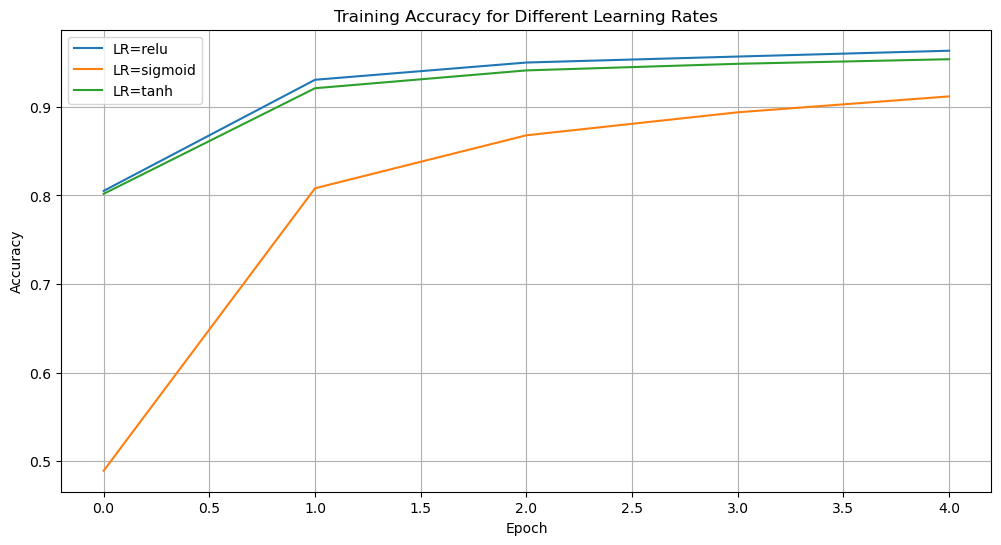

In [19]:
activation_functions = ['relu', 'sigmoid', 'tanh']
history_dict_act2 = {}
for activation_func in activation_functions:
    model_act2 = Sequential([
        Conv2D(32, (3, 3), activation=activation_func, input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation=activation_func),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation=activation_func),
        Flatten(),
        Dense(64, activation=activation_func),
        Dense(10, activation='softmax')
    ])
    model_act2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history_act2 = model_act2.fit(datagen.flow(train_images, train_labels, batch_size=64), epochs=5, validation_data=(test_images, test_labels))
    history_dict_act2[activation_func] = history_act2
plt.figure(figsize=(12, 6))
for activation_func, history_act2 in history_dict_act2.items():
    plt.plot(history_act2.history['accuracy'], label=f'LR={activation_func}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy for Different Learning Rates')
plt.legend()
plt.grid()
plt.show()

### 4. Demonstrate the results with all possible evaluation criteria.

In [22]:
model4 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [23]:
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model4.fit(datagen.flow(train_images, train_labels, batch_size=64), epochs=5, validation_data=(test_images, test_labels))
predictions = model4.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")
print("Confusion Matrix:\n", conf_matrix)

Epoch 1/5
938/938 [==============================] - 17s 18ms/step - loss: 0.6062 - accuracy: 0.7977 - val_loss: 0.1484 - val_accuracy: 0.9513
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 0.2283 - accuracy: 0.9278 - val_loss: 0.0813 - val_accuracy: 0.9733
Epoch 3/5
938/938 [==============================] - 17s 18ms/step - loss: 0.1643 - accuracy: 0.9480 - val_loss: 0.0785 - val_accuracy: 0.9738
Epoch 4/5
938/938 [==============================] - 17s 18ms/step - loss: 0.1382 - accuracy: 0.9566 - val_loss: 0.0696 - val_accuracy: 0.9768
Epoch 5/5
313/313 [==============================] - 1s 1ms/step
Accuracy: 0.9852, Precision: 0.9852239550343059, Recall: 0.9852, F1-Score: 0.9851964856573623
Confusion Matrix:
 [[ 975    0    1    0    0    0    1    1    0    2]
 [   0 1130    2    1    0    0    0    2    0    0]
 [   1    2 1005    0    1   15    3    5    0    0]
 [   0    0    1 1001    0    4    0    3    1    0]
 [   0    1    0    0  971    0    1  

### 5. Demonstrate the learning results in all possible visualizing ways.

Epoch 1/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0355 - accuracy: 0.9891 - val_loss: 0.0249 - val_accuracy: 0.9918
Epoch 2/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0232 - accuracy: 0.9930 - val_loss: 0.0234 - val_accuracy: 0.9924
Epoch 3/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0191 - accuracy: 0.9942 - val_loss: 0.0260 - val_accuracy: 0.9919
Epoch 4/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0145 - accuracy: 0.9955 - val_loss: 0.0320 - val_accuracy: 0.9904
Epoch 5/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0132 - accuracy: 0.9958 - val_loss: 0.0253 - val_accuracy: 0.9924
Epoch 6/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0115 - accuracy: 0.9963 - val_loss: 0.0259 - val_accuracy: 0.9931
Epoch 7/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0102 - accuracy: 0.9965 - val_loss: 0.0254 - val_accuracy: 0.9920
Epoch 

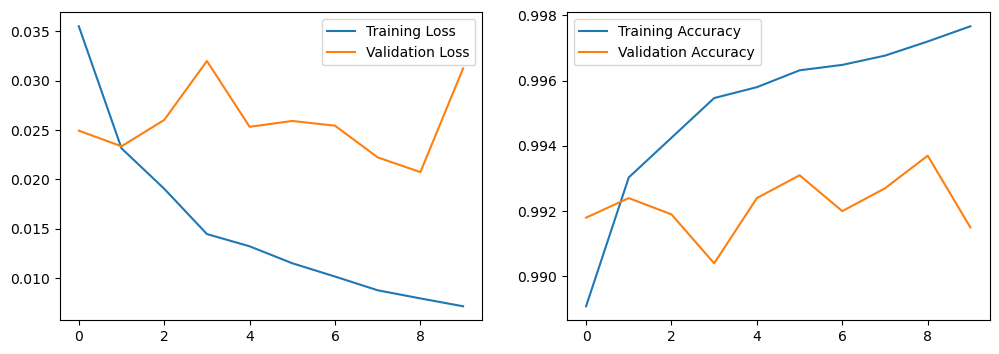

In [24]:
history4 = model4.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history4.history['accuracy'], label='Training Accuracy')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

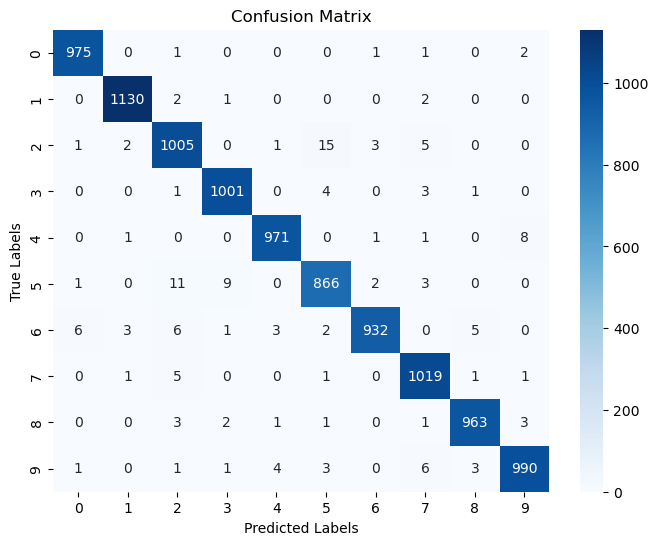

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()